<a href="https://colab.research.google.com/github/Aashishc-prog/Yes-Bank-Stock-Closing-Price-prediction-/blob/main/Capstone_2_Yes_Bank_stock_closing_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YES BANK STOCK CLOSING PRICE PREDICTION**


##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

##Importing libraries

In [2]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


## Mounting drive

In [3]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/Project 2/data_YesBank_StockPrices (1).csv')

##Preprocesssing data

In [5]:
# Let's check how many rows and columns do we have in our dataset
df.shape

(185, 5)

In [6]:
#Let's see how our data looks like
df.head().T

,0,1,2,3,4
Date,Jul-05,Aug-05,Sep-05,Oct-05,Nov-05
Open,13.0,12.58,13.48,13.2,13.35
High,14.0,14.88,14.87,14.47,13.88
Low,11.25,12.55,12.27,12.4,12.88
Close,12.46,13.42,13.3,12.99,13.41


In [7]:
df.tail().T

,180,181,182,183,184
Date,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
Open,25.6,12.0,14.3,13.3,12.41
High,28.3,17.16,15.34,14.01,14.9
Low,11.1,11.85,12.75,12.11,12.21
Close,11.95,14.37,13.15,12.42,14.67


In [8]:
#Checking what features are  in our dataset 
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

**Description of our dataset**

Our Yes Bank dataset contains following features:


*  Date: Date is monthly observation of stocks since its inception.
*  Open: It is the price of a stock when the stock exchange open for that day.
*  High: The maximum price of a stock attain at given period of time.
*  Low: The minimum price of a stock attain at given period of time.
*  Close: The price of a stock when the stock exchange closed for that day.



In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [10]:
#Getting information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [11]:
#Checking dulpicate values in dataset
len(df[df.duplicated()])

0

so no duplicate value is present in our dataset

In [13]:
#Checking null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

so our given data set has no null values

In [14]:
# Summary of our dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,185,185,Jul-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,185.0,NaN,NaN,NaN,105.541405,98.87985,10.0,33.8,62.98,153.0,369.95
High,185.0,NaN,NaN,NaN,116.104324,106.333497,11.24,36.14,72.55,169.19,404.0
Low,185.0,NaN,NaN,NaN,94.947838,91.219415,5.55,28.51,58.0,138.35,345.5
Close,185.0,NaN,NaN,NaN,105.204703,98.583153,9.98,33.45,62.54,153.3,367.9


#EDA


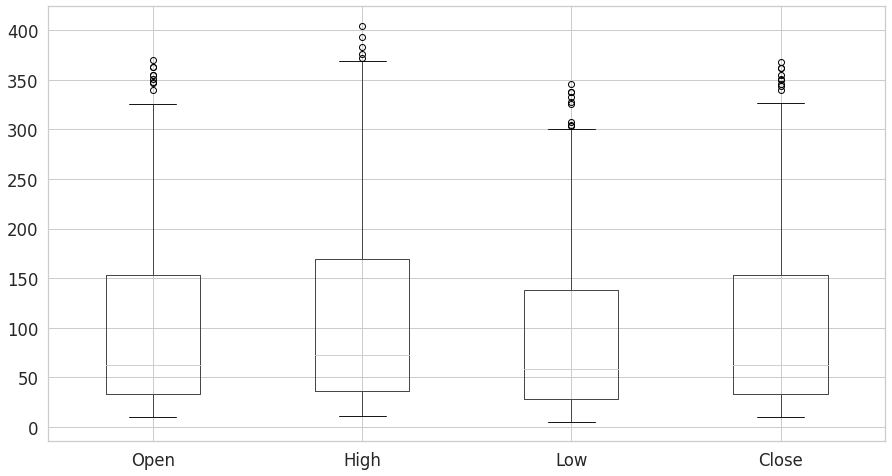

In [17]:
##Boxplot of variables for checking outliers
fig = plt.figure(figsize =(15, 8))
boxplot = df.boxplot(column=['Open','High','Low',"Close"])
 
plt.show()

In [16]:
##Changing the date time format
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [19]:
##Let's see our dataset after changing date format
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


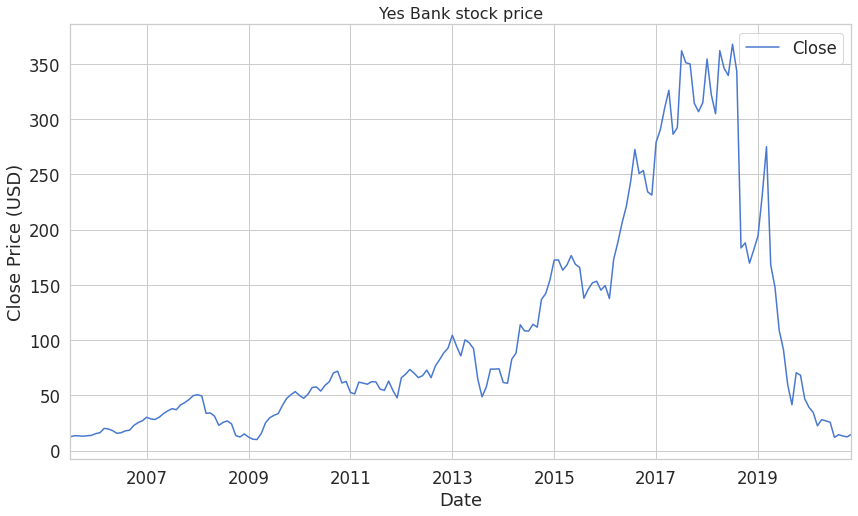

In [20]:
##Visualizing closing price w.r.t to date of stock
ax = df.plot(x='Date', y="Close");
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
plt.title('Yes Bank stock price', fontsize=16)
plt.show()

In [21]:
##Declaring dependent and independent variables
indep_var=df[['High','Low','Open']]
dep_var=df['Close']

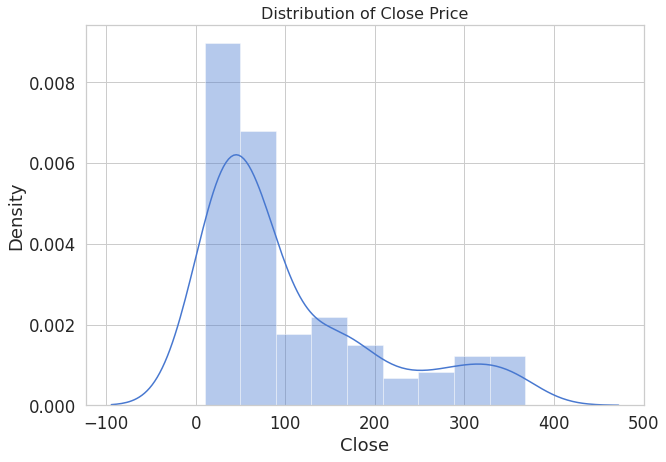

In [24]:
## Distribution plot of dependent variable
plt.figure(figsize=(10,7))
plt.title('Distribution of Close Price', fontsize=16)
sns.distplot(df['Close'])

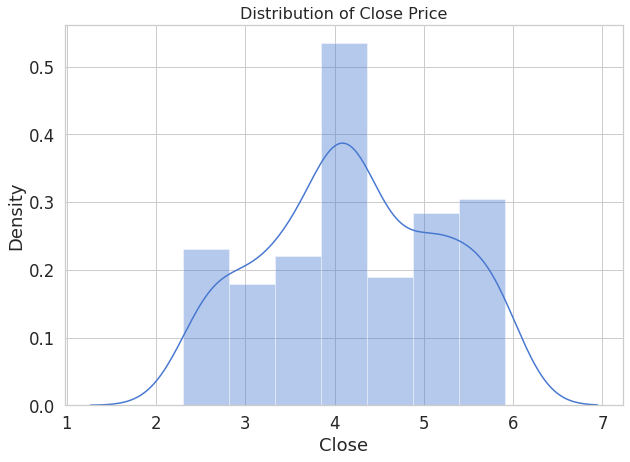

In [25]:
# Distribution plot of dependent variable after applying log transoformation
plt.figure(figsize=(10,7))
plt.title('Distribution of Close Price', fontsize=16)
sns.distplot(np.log(df['Close']))

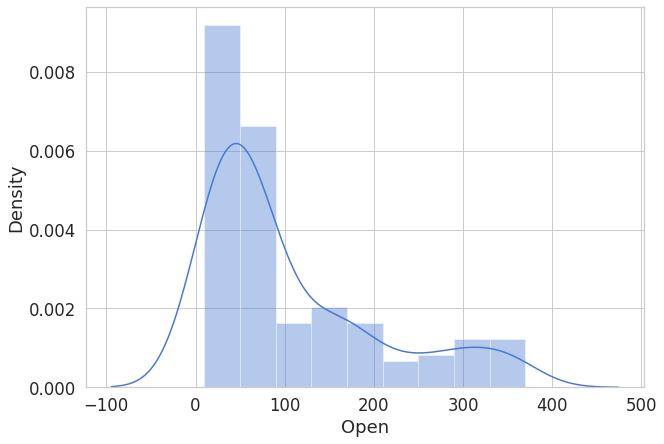

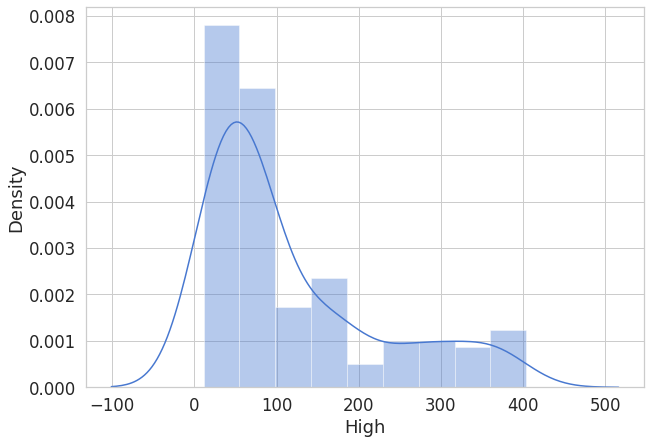

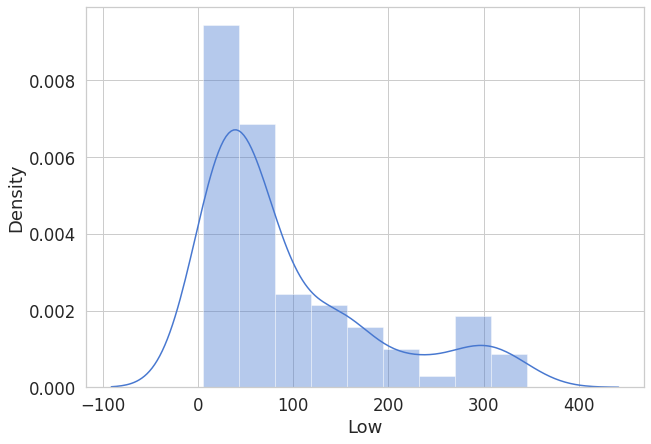

In [26]:
#Plotting distribution of independent variables
plt.figure(figsize=(10,7))
sns.distplot(df['Open'])

plt.figure(figsize=(10,7))
sns.distplot(df['High'])

plt.figure(figsize=(10,7))
sns.distplot(df['Low'])

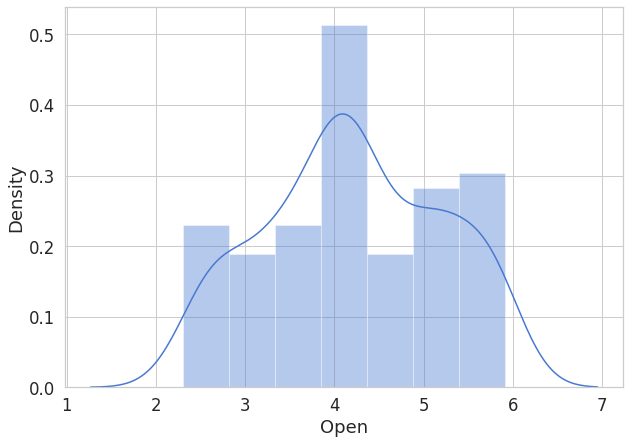

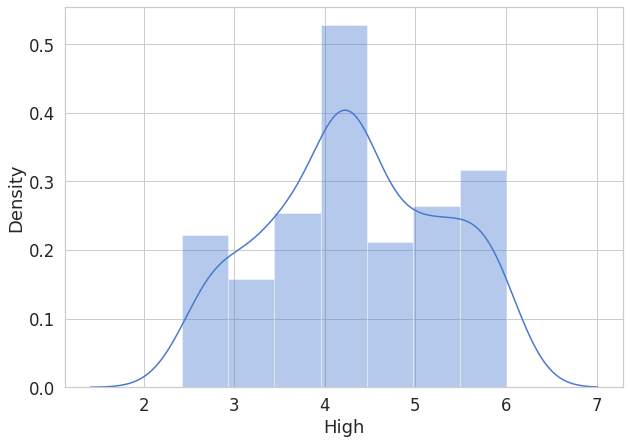

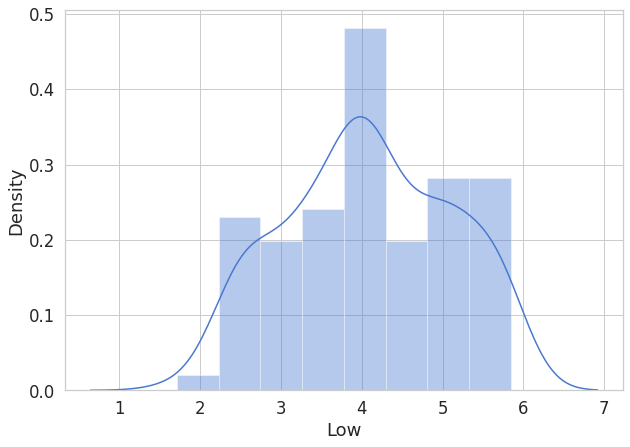

In [27]:
#Plotting distribution of independent variables by applying log transformation
plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Open']))

plt.figure(figsize=(10,7))
sns.distplot(np.log(df['High']))

plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Low']))

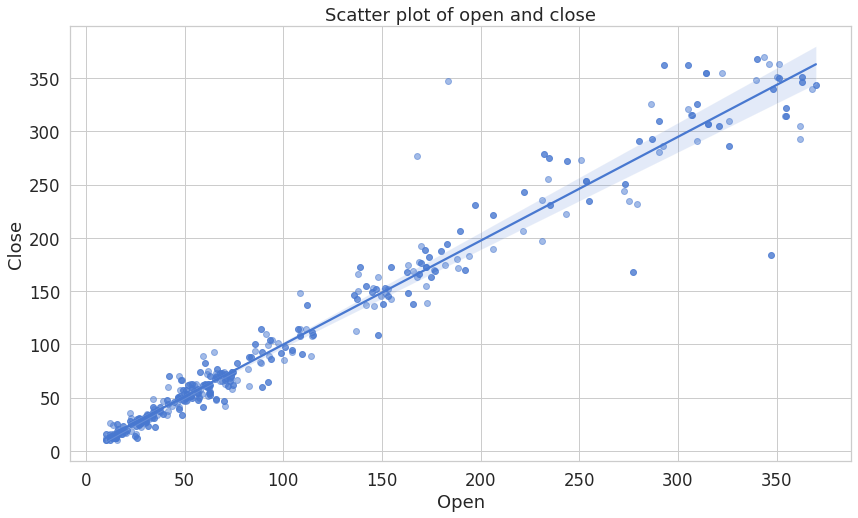

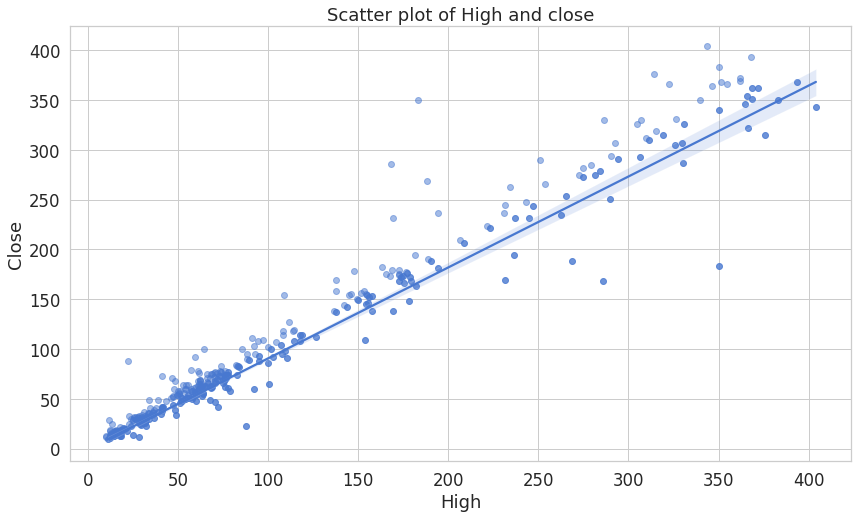

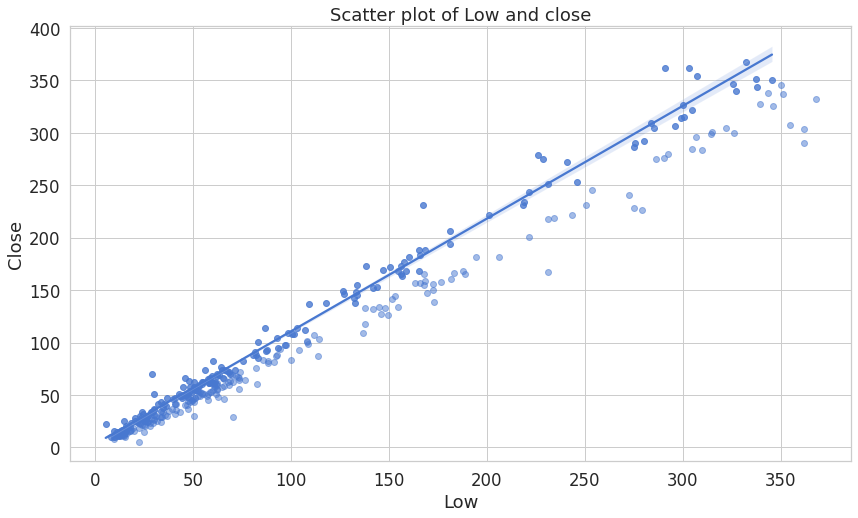

In [28]:
#Bivarate analysis
plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter plot of open and close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x="Open", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter plot of High and close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x="High", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter plot of Low and close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x="Low", y="Close", data=df)
plt.show()

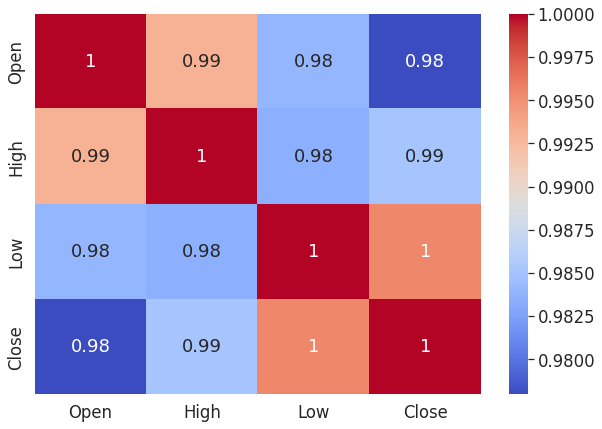

In [29]:
#Correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

All variables are highly correleated with each other

In [30]:
#Multicollinearity
#VIF score

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [31]:
calc_vif(indep_var)

,variables,VIF
0,High,167.057523
1,Low,71.574137
2,Open,175.185704


In [32]:
#empty data frame creation for evaluation metrics for each regression model into this data frame to compare at the end.
i=0
error_df=pd.DataFrame()